In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# def add_gaussian_noise(image, mean = 0, stddev = 75):
#     gaussian_noise = np.random.normal(mean, stddev, image.shape)
#     noisy_image = gaussian_noise + image
#     noisy_image = np.clip(noisy_image, 0, 255)
#     return noisy_image.astype(np.uint8)

In [30]:
def add_gaussian_noise(image, mean=0, stddev=75):
    gaussian_noise = np.random.normal(mean, stddev, image.shape)
    noisy_image = gaussian_noise + image
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

In [31]:
# def gaussian_high_pass_filter(image, cut_off_frequency):
#     height, width = image.shape
#     H = np.zeros(image.shape)
#     D0 = cut_off_frequency

#     frequency_domain_image = np.fft.fftshift(np.fft.fft2(image))

#     for i in range(height):
#         for j in range(width):
#             D = np.sqrt((i - height / 2)**2 + (j-width/2) ** 2)
#             H[i, j] = 1 - np.exp(-(D**2) / (2*D0)**2)

#     filtered_image = frequency_domain_image * H
#     filtered_image = np.abs(np.fft.ifft2(filtered_image))
#     filtered_image = filtered_image / 255
#     return filtered_image


In [32]:
def gaussian_high_pass_filter(image, cut_off_frequency):
    height, width = image.shape
    H = np.zeros(image.shape)
    D0 = cut_off_frequency

    frequency_domain_image = np.fft.fftshift(np.fft.fft2(image))

    for i in range(height):
        for j in range(width):
            D = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            H[i,j] = 1- np.exp(-(D**2)/(2*D0)**2)

    filtered_image = frequency_domain_image * H
    filtered_image = np.abs(np.fft.ifftshift(np.fft.ifft2(filtered_image)))
    filtered_image = filtered_image / 255
    return filtered_image

In [33]:
def ideal_high_pass_filter(image, cut_off_frequency):
    height, width = image.shape
    H = np.zeros(image.shape)
    D0 = cut_off_frequency

    frequency_domain_image = np.fft.fftshift(np.fft.fft2(image))

    for i in range(height):
        for j in range(width):
            D = np.sqrt((i - height / 2)**2 + (j-width/2) ** 2)
            H[i, j] = D > D0
    
    filtered_image = frequency_domain_image * H
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
    filtered_image = filtered_image / 255
    return filtered_image


In [ ]:
def ideal_high_pass_filter(image, cut_off_frequency):
    height, width = image.shape
    H = np.zeros(image.shape)
    D0 = cut_off_frequency

    frequency_domain_image = np.fft.fftshift(np.fft.fft2(image))

    for i in range(height):
        for j in range(width):
            D = np.sqrt((i-height/2) **2 + (j-width/2)**2)
            H[i,j] = D > D0
    
    filtered_image = frequency_domain_image * H
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
     

In [34]:

original_image = plt.imread('ck.tif')
noisy_image = add_gaussian_noise(original_image, 0, 25)


In [35]:
cut_off_frequency = 30
noisy_image_filtered_by_gausssian = gaussian_high_pass_filter(noisy_image, cut_off_frequency)
original_image_filtered_by_gausssian = gaussian_high_pass_filter(original_image, cut_off_frequency)


In [36]:
noisy_image_filtered_by_ideal = ideal_high_pass_filter(noisy_image, cut_off_frequency)
original_image_filtered_by_ideal = ideal_high_pass_filter(original_image, cut_off_frequency)

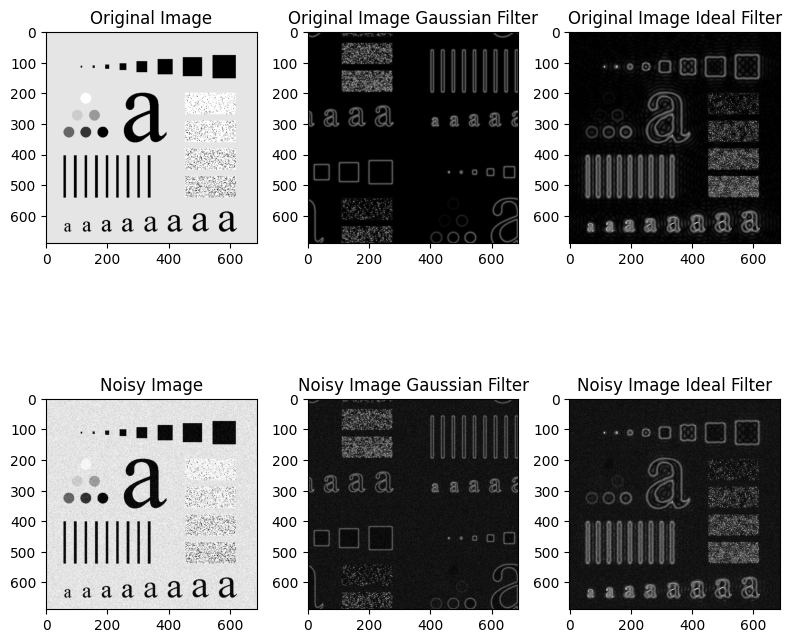

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
plt.imshow(original_image,  cmap='gray')
plt.title('Original Image')
plt.subplot(2, 3, 2)
plt.imshow(original_image_filtered_by_gausssian,  cmap='gray')
plt.title('Original Image Gaussian Filter')
plt.subplot(2, 3, 3)
plt.imshow(original_image_filtered_by_ideal,  cmap='gray')
plt.title('Original Image Ideal Filter')
plt.subplot(2, 3, 4)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.subplot(2, 3, 5)
plt.imshow(noisy_image_filtered_by_gausssian, cmap='gray')
plt.title('Noisy Image Gaussian Filter')
plt.subplot(2, 3, 6)
plt.imshow(noisy_image_filtered_by_ideal, cmap='gray')
plt.title('Noisy Image Ideal Filter')

plt.tight_layout()
plt.show()